# Population Density Data

### Introduction 
In order for a zombie to have the best chance of survival there needs to be a lot of people who aren't close together. If they were close together they would all be able to gang up and kill the zombie so there needs to be a neighborhood that has just the right balance of people and density.

In [4]:
# load pandas, geopandas, numpy, shapely, and matplotlib
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline

# load population density data 
popden = pd.read_csv("population-density.xls.csv",index_col = "Neighborhood")

# displays original dataset
popden

,Sector #,Pop. 1940,Pop. 1950,Pop. 1960,Pop. 1970,Pop. 1980,Pop. 1990,Pop. 2000,Pop. 2010,"% Pop. Change, 60-70",...,% Other (2010),% White (2010),% 2+ Races (2010),% Hispanic (of any race) (2010),% Pop. Age < 5 (2010),% Pop. Age 5-19 (2010),% Pop. Age 20-34 (2010),% Pop. Age 35-59 (2010),% Pop. Age 60-74 (2010),% Pop. Age > 75 (2010)
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,3,4521,3862,2512,632,1586,1262,886,933,-74.84%,...,0.64%,40.84%,0.0397,0.029,0.0419,0.2170,0.2757,0.2243,0.1761,0.0650
Allegheny West,3,3210,3313,2170,1124,820,654,508,462,-48.20%,...,0.65%,76.62%,0.0303,0.028,0.0000,0.0000,0.0837,0.6820,0.1255,0.1088
Allentown,6,8227,7487,6416,5361,4292,3600,3220,2500,-16.44%,...,0.80%,59.40%,0.0464,0.023,0.0366,0.1485,0.2411,0.3530,0.1440,0.0767
Arlington,7,2702,3203,4430,3949,2294,2210,1999,1869,-10.86%,...,0.37%,76.46%,0.0316,0.014,0.0691,0.1889,0.1945,0.3153,0.0888,0.1433
Arlington Heights,7,2413,2860,2272,2037,1466,1497,238,244,-10.34%,...,1.64%,9.43%,0.0492,0.008,0.0410,0.3925,0.1638,0.3072,0.0341,0.0614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,13,6848,6164,5221,4482,3710,3328,2899,2669,-14.15%,...,1.80%,65.72%,0.0296,0.031,0.0643,0.2217,0.2448,0.2957,0.1194,0.0540
West End,4,1984,1820,1702,920,604,441,466,254,-45.95%,...,1.18%,53.15%,0.0748,0.004,0.0000,0.2586,0.2931,0.0862,0.2672,0.0948
West Oakland,14,2952,4073,3658,3140,2955,1938,2272,2604,-14.16%,...,0.50%,52.73%,0.0177,0.023,0.0193,0.3886,0.2938,0.1701,0.0806,0.0476


In [5]:
# changes pop. 2010 and land area(acres) from strings to ints
popden['Pop. 2010'] = popden['Pop. 2010'].astype(int)
popden['Land Area (acres)'] = popden['Land Area (acres)'].astype(float)

# filters data to display only pop. 2010 and land area(acres)
rpopden = popden.iloc[:,[8,16,19]]

# sorts data 
rpopden.sort_values(by = ['Pop. 2010','Land Area (acres)'], ascending = False)

,Pop. 2010,Land Area (acres),Persons / acre (2010)
Neighborhood,,,
Squirrel Hill South,15110,1709.44,8.8
Shadyside,13915,589.44,23.6
Brookline,13214,1332.48,9.9
Squirrel Hill North,11363,782.08,14.5
North Oakland,10551,319.36,33.0
...,...,...,...
West End,254,128.00,2.0
Arlington Heights,244,84.48,2.9
St. Clair,209,198.40,1.1


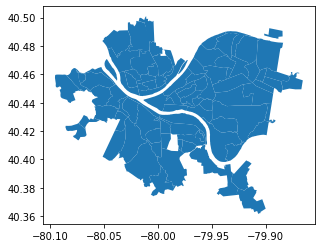

In [6]:
# read shapefiles
neighborhoods = gpd.read_file('Neighborhoods/Neighborhoods_.shp')

# plot the geopandas dataframe
neighborhoods.plot() 

In [46]:
# do the merge
neighborhoods_map = neighborhoods.merge(rpopden, how='left', left_on='hood', right_on='Neighborhood')

# look at the head to confirm it merged correctly
neighborhoods_map[['hood','Pop. 2010','Land Area (acres)','geometry']].head()

,hood,Pop. 2010,Land Area (acres),geometry
0,Central Oakland,6086,179.84,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,10551,319.36,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,2604,137.60,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,2256,165.12,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,616,389.12,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


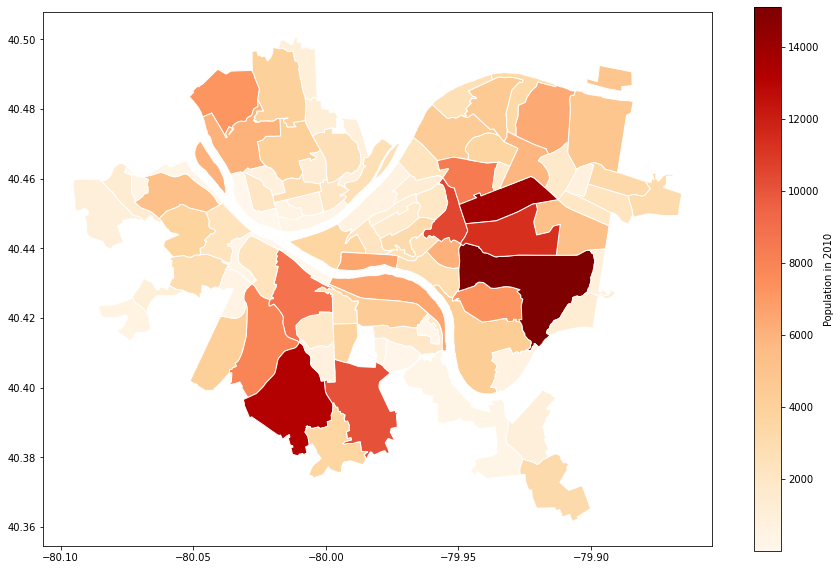

In [53]:
neighborhoods_map.plot(column='Pop. 2010',                            # set the data to be used for coloring
                       cmap='OrRd',                                   # choose a color palette
                       edgecolor="white",                             # outline the districts in white
                       legend=True,                                   # show the legend
                       legend_kwds={'label': "Population in 2010"},   # label the legend
                       figsize=(15, 10),                              # set the size
                       ) 

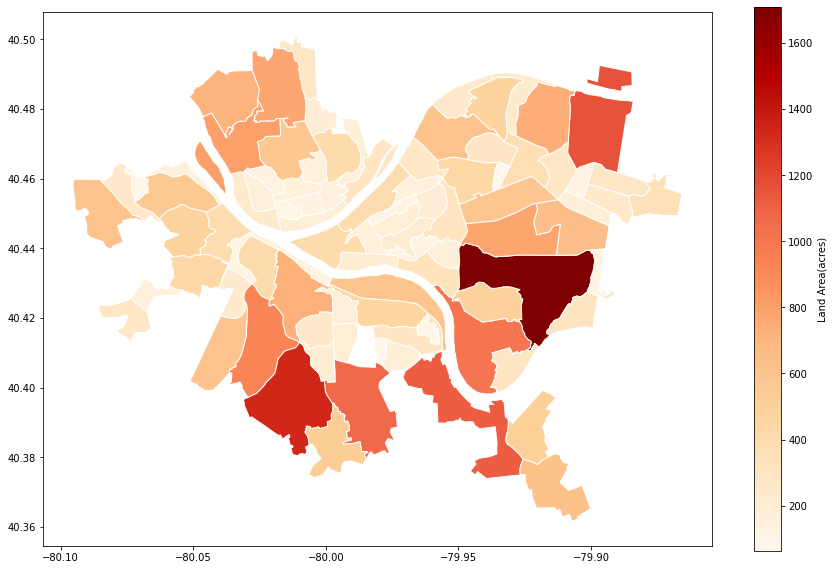

In [56]:
neighborhoods_map.plot(column= 'Land Area (acres)',                   # set the data to be used for coloring
                       cmap='OrRd',                                   # choose a color palette
                       edgecolor="white",                             # outline the districts in white
                       legend=True,                                   # show the legend
                       legend_kwds={'label': "Land Area(acres)"},     # label the legend
                       figsize=(15, 10),                              # set the size
                       ) 

### Best Neighborhood
After sorting the data according to these metrics we found that the best neighborhood was Squierrel Hill South as it has both a high population and low density. 